In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv("12_coin_Bitcoin.csv")
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
# Step 2: Create the target column
data['Target'] = (data['High'] + data['Low']) / 2
data = data.drop(columns=['Open', 'Close'])

In [ ]:
# Step 3: Preprocess the date column
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].astype(np.int64) // 10**9

In [ ]:
# Step 4: Split the data into training and testing sets
X = data.drop(columns=['Target', 'Name', 'Symbol', 'SNo'])
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 5: Apply linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 6: Evaluate the model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

In [ ]:
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training MAE: 9.447970400098264e-06
Testing MAE: 9.487426157783703e-06
Training MSE: 1.8043621548400444e-10
Testing MSE: 1.7569602271585876e-10


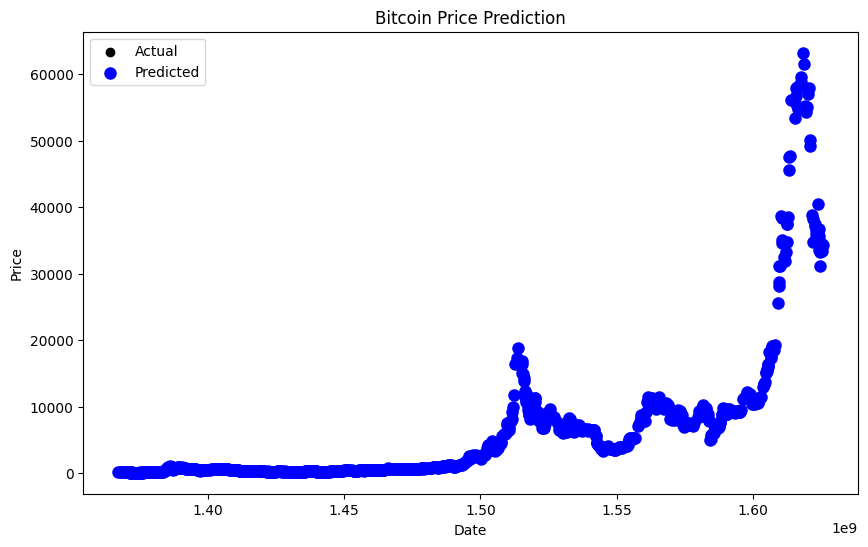

In [ ]:
# Step 7: Draw the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Date'], y_test, color='black', label='Actual')
plt.scatter(X_test['Date'], test_predictions, color='blue', linewidth=3, label='Predicted')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Step 8: Predict Bitcoin's value for the next two months
# We need to predict the value for the next two months based on the last date in the dataset
last_date = data['Date'].max()
next_month = last_date + (30 * 24 * 60 * 60)  # Add 30 days in seconds
two_months = last_date + (60 * 24 * 60 * 60)  # Add 60 days in seconds

In [ ]:
# Create features for prediction
next_month_data = pd.DataFrame({'Date': [next_month, two_months],
                                'High': [data['High'].iloc[-1], data['High'].iloc[-1]],
                                'Low': [data['Low'].iloc[-1], data['Low'].iloc[-1]],
                                'Volume': [0, 0],
                                'Marketcap': [0, 0]})

In [ ]:
# Predict using the trained model
next_month_predictions = model.predict(next_month_data)
print("Predicted Bitcoin value for next month:", next_month_predictions[0])
print("Predicted Bitcoin value for two months later:", next_month_predictions[1])

Predicted Bitcoin value for next month: 34319.22626414806
Predicted Bitcoin value for two months later: 34319.226264294855
